In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_excel('CognitiveDistortions_new.xlsx')
df['Label'] = df['Label'].map({'No Distortion': 0, 'Distortion': 1})
df

,Text,Label,Contradictive statements,Positive statements,Negative statements,Rude statements,Mindreading,Dichotomous Reasoning,Emotional Reasoning,Should statements,Labeling and mislabeling,Personalizing,Magnification and Minimization,Overgeneralizing,Catastrophizing,Disqualifying the Positive,Fortune-telling,Mental Filtering,Average (all),Average (without Pos/Neg/Rud/Con)
0,I'm such a failure I never do anything right.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nobody likes me because I'm not interesting.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I can't try new things because I'll just mess...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,My boss didn't say 'good morning' she must be...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,My friend didn't invite me to the party I mus...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522,Since then whenever my mother is out alone I b...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3523,My family hate him but they didn’t met him at ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3524,However I am not happy at the least only half ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3525,Now I am at university my peers around me all ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Перемешивание данных 
#df = df.sample(frac=1, random_state=42).reset_index(drop=True)
#df

In [3]:
#смотрю текст по "нашим" метрикам
import os, sys, math

import datetime as dt
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

from pygents.aigents_api import AigentsSentiment, PygentsSentiment, TextMetrics
from pygents.util import vector_proximity


def language_metrics(lang,metrics_list):
    metrics = {}
    for m in metrics_list:
        metrics[m] = './data/dict/' + lang + '/' + m + '.txt'
    return metrics

        
p = PygentsSentiment('./data/dict/en/positive.txt',
                     './data/dict/en/negative.txt',debug=True)
a = TextMetrics(language_metrics('en',['catastrophizing','dichotomous-reasoning']),debug=True)
s = TextMetrics(language_metrics('en',['positive','negative']),debug=True)

import numpy as np
labels = ['positive','negative','rude',
'catastrophizing','dichotomous-reasoning','disqualifying-positive','emotional-reasoning','fortune-telling',
'labeling','magnification','mental-filtering','mindreading','overgeneralizing','personalizing','should-statement']
l = TextMetrics(language_metrics('en',labels),debug=False)

columns_dict = {0: "Contradictive statements", 1: "Positive statements", 2: "Negative statements", 3: "Mindreading", 4: "Rude statements", 5: "Dichotomous Reasoning", 6: "Emotional Reasoning", 7: "Should statements", 8: "Labeling and mislabeling", 9: "Personalizing", 10: "Magnification and Minimization", 11: "Overgeneralizing", 12: "Catastrophizing", 13: "Disqualifying the Positive", 14: "Mental Filtering", 15: "Fortune-telling"}
metric_names_dict = {"contradictive": 0, "positive": 1, "negative": 2, "mindreading": 3, "rude": 4, "dichotomous-reasoning": 5, "emotional-reasoning": 6, "should-statement": 7, "labeling": 8, "personalizing": 9, "magnification": 10, "overgeneralizing": 11, "catastrophizing": 12, "disqualifying-positive": 13, "mental-filtering": 14, "fortune-telling": 15}
columns_values = np.zeros((len(df), len(columns_dict)))
texts = df['Text'] 

for i, t in enumerate(texts):
    metrics = l.get_sentiment_words(t)
    for metric_name, metric in metrics.items():
        columns_values[i][metric_names_dict[metric_name]] = metric

for j in range(columns_values.shape[1]):
    df[columns_dict[j]] = pd.Series(columns_values[:, j])

df

,Text,Label,Contradictive statements,Positive statements,Negative statements,Rude statements,Mindreading,Dichotomous Reasoning,Emotional Reasoning,Should statements,Labeling and mislabeling,Personalizing,Magnification and Minimization,Overgeneralizing,Catastrophizing,Disqualifying the Positive,Fortune-telling,Mental Filtering,Average (all),Average (without Pos/Neg/Rud/Con)
0,I'm such a failure I never do anything right.,1,0.52,0.52,0.52,0.0,0.0,0.00,0.0,0.00,0.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,Nobody likes me because I'm not interesting.,1,0.64,0.71,0.57,0.0,0.0,0.57,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,I can't try new things because I'll just mess...,1,0.55,0.62,0.49,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,My boss didn't say 'good morning' she must be...,1,0.51,0.58,0.44,0.0,0.0,0.00,0.0,0.44,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,My friend didn't invite me to the party I mus...,1,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.44,0.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522,Since then whenever my mother is out alone I b...,1,0.55,0.52,0.58,0.0,0.0,0.22,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3523,My family hate him but they didn’t met him at ...,1,0.49,0.47,0.51,0.0,0.0,0.34,0.0,0.00,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3524,However I am not happy at the least only half ...,1,0.43,0.41,0.46,0.0,0.0,0.23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3525,Now I am at university my peers around me all ...,1,0.48,0.40,0.58,0.0,0.0,0.28,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [4]:
#считаю среднее
start_column = 'Contradictive statements'
selected_columns = df.loc[:, start_column:]
average_row = selected_columns.mean(axis=1)
df["Average (all)"] = average_row

#считаю среднее без positive/negative/rude/contradictive
start_column = 'Mindreading'
selected_columns = df.loc[:, start_column:]
average_row = selected_columns.mean(axis=1)
df["Average (without Pos/Neg/Rud/Con)"] = average_row

df_future = df.copy() #пригодится попозже
df

,Text,Label,Contradictive statements,Positive statements,Negative statements,Rude statements,Mindreading,Dichotomous Reasoning,Emotional Reasoning,Should statements,Labeling and mislabeling,Personalizing,Magnification and Minimization,Overgeneralizing,Catastrophizing,Disqualifying the Positive,Fortune-telling,Mental Filtering,Average (all),Average (without Pos/Neg/Rud/Con)
0,I'm such a failure I never do anything right.,1,0.52,0.52,0.52,0.0,0.0,0.00,0.0,0.00,0.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138750,0.061442
1,Nobody likes me because I'm not interesting.,1,0.64,0.71,0.57,0.0,0.0,0.57,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155625,0.055817
2,I can't try new things because I'll just mess...,1,0.55,0.62,0.49,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103750,0.007981
3,My boss didn't say 'good morning' she must be...,1,0.51,0.58,0.44,0.0,0.0,0.00,0.0,0.44,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123125,0.043317
4,My friend didn't invite me to the party I mus...,1,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.44,0.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063750,0.083365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522,Since then whenever my mother is out alone I b...,1,0.55,0.52,0.58,0.0,0.0,0.22,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116875,0.025913
3523,My family hate him but they didn’t met him at ...,1,0.49,0.47,0.51,0.0,0.0,0.34,0.0,0.00,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138750,0.068365
3524,However I am not happy at the least only half ...,1,0.43,0.41,0.46,0.0,0.0,0.23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095625,0.025048
3525,Now I am at university my peers around me all ...,1,0.48,0.40,0.58,0.0,0.0,0.28,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108750,0.029904


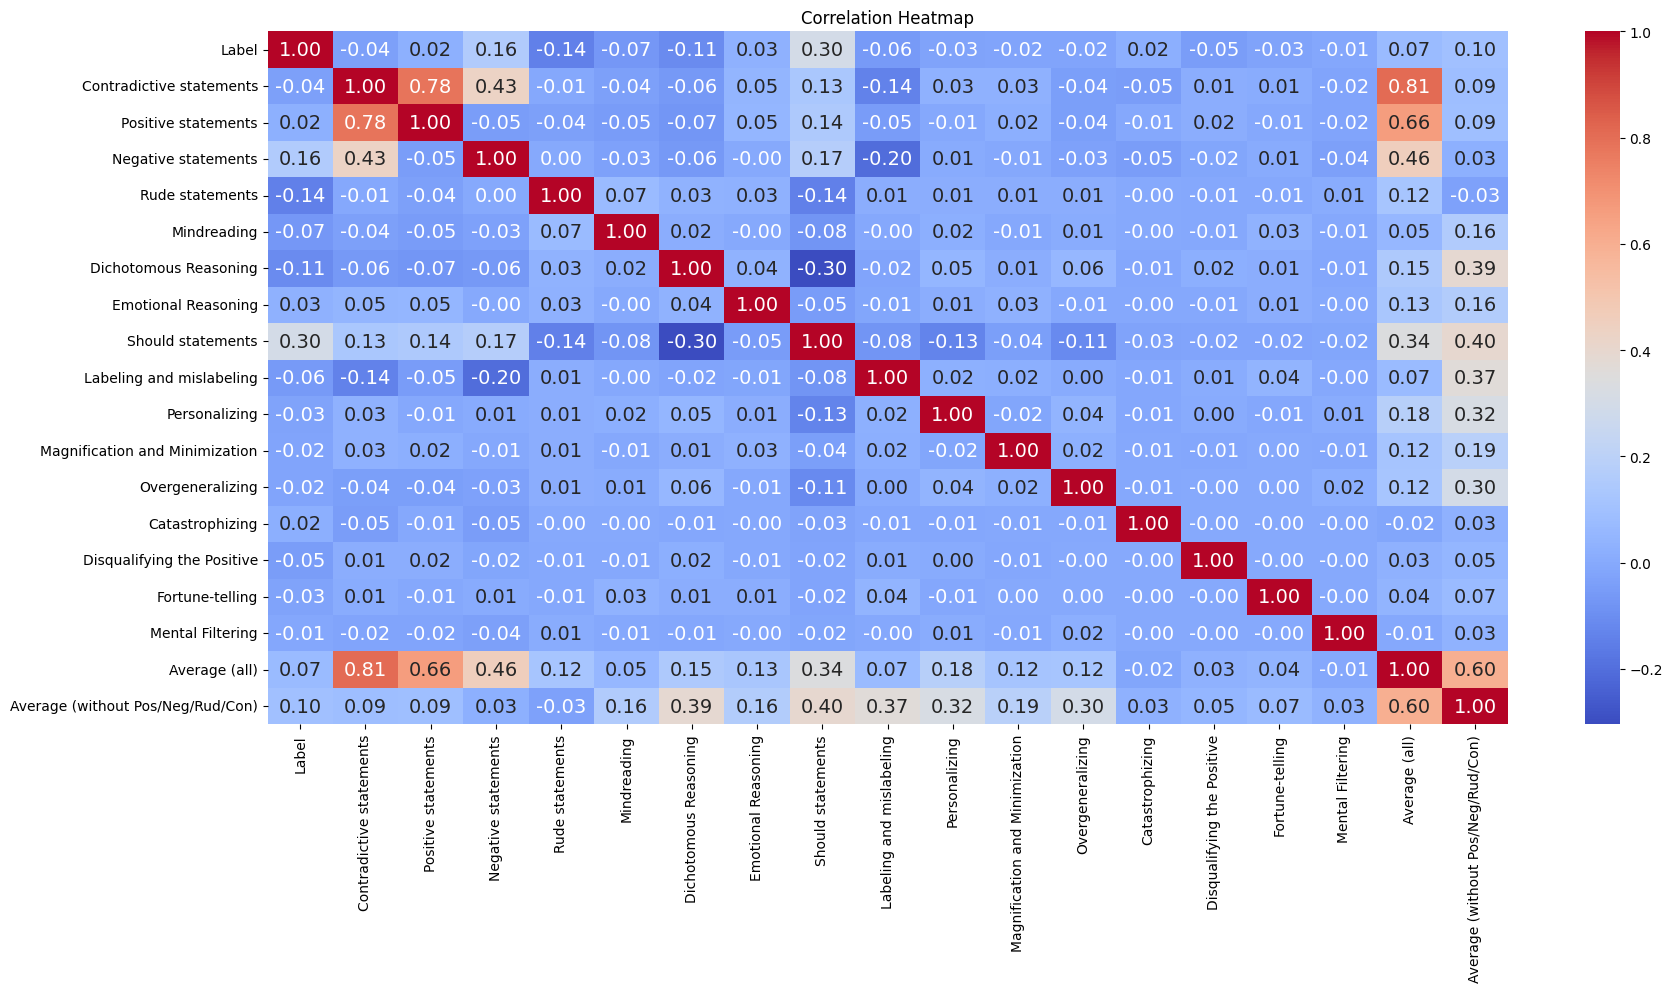

In [5]:
# Посмотрим корреляцию между всеми столбцами
new_df = df.drop('Text', axis=1)
corr = new_df.corr()

plt.figure(figsize=(20, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 14})
plt.title('Correlation Heatmap')
plt.savefig('heatmap_second_dataset.png', bbox_inches='tight', dpi=150)
plt.show()

In [6]:
# Минимальное значение равно 0 для любого столбца. Максимальное значение для столбцов, соотвествующих когнитивным искажениям, равно 1.
# Поэтому найдем максимальные значения для столбцов средних значений. Они нам пригодятся для сведения нашей классификации к бинарному виду.
max_value1 = df['Average (all)'].max()
max_value2 = df['Average (without Pos/Neg/Rud/Con)'].max()
print(max_value1, max_value2)

0.206875 0.13817307692307693


In [7]:
# Теперь пусть среднее значение для бинарной классификации у столбцов, соотвествующих когнитивным искажениям, равно 0.5.
# А для столбцов средних значений возьмем max_value/2
# Далее присвоим всем значениям 0, если они <= среднего, и 1 иначе.

average1 = max_value1/2
df.loc[df['Average (all)'] > average1, 'Average (all)'] = 1
df.loc[df['Average (all)'] <= average1, 'Average (all)'] = 0

average2 = max_value2/2
df.loc[df['Average (without Pos/Neg/Rud/Con)'] > average2, 'Average (without Pos/Neg/Rud/Con)'] = 1
df.loc[df['Average (without Pos/Neg/Rud/Con)'] <= average2, 'Average (without Pos/Neg/Rud/Con)'] = 0

column_names = df.columns
for i in column_names:
    if i != 'Text' and i != 'Label' and i != 'Average (all)' and i != 'Average (without Pos/Neg/Rud/Con)':
        df.loc[df[i] > 0.5, i] = 1
        df.loc[df[i] <= 0.5, i] = 0
df

,Text,Label,Contradictive statements,Positive statements,Negative statements,Rude statements,Mindreading,Dichotomous Reasoning,Emotional Reasoning,Should statements,Labeling and mislabeling,Personalizing,Magnification and Minimization,Overgeneralizing,Catastrophizing,Disqualifying the Positive,Fortune-telling,Mental Filtering,Average (all),Average (without Pos/Neg/Rud/Con)
0,I'm such a failure I never do anything right.,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Nobody likes me because I'm not interesting.,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,I can't try new things because I'll just mess...,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,My boss didn't say 'good morning' she must be...,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,My friend didn't invite me to the party I mus...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522,Since then whenever my mother is out alone I b...,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3523,My family hate him but they didn’t met him at ...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3524,However I am not happy at the least only half ...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3525,Now I am at university my peers around me all ...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
# У нас фиксированный порог = среднему значению. 
#Будем смотреть F_i score между стобцом Label и нашими когнитивными искажениями + средними значениями в зависимости от параметра i 
df_metrics = pd.read_excel('metrics.xlsx')
cognitive_distortions = df_metrics['Cognitive distortions'].tolist()
count = 0

for i in cognitive_distortions:
    
    true_positives = ((df[i] == 1) & (df['Label'] == 1)).sum()
    false_positives = ((df[i] == 1) & (df['Label'] == 0)).sum()
    if (true_positives + false_positives) != 0:
        precision = true_positives / (true_positives + false_positives)
    else:
        precision = 0
    
    
    false_negatives = ((df[i] == 0) & (df['Label'] == 1)).sum()
    if (true_positives + false_negatives) != 0:
        recall = true_positives / (true_positives + false_negatives)
    else:
        recall = 0
    
    
    if precision != 0 and recall != 0:
        f_0_1 = (1+(0.1)**2) * (precision*recall)/((((0.1)**2)*precision)+recall)
        f_0_2 = (1+(0.2)**2) * (precision*recall)/((((0.2)**2)*precision)+recall)
        f_0_3 = (1+(0.3)**2) * (precision*recall)/((((0.3)**2)*precision)+recall)
        f_0_4 = (1+(0.4)**2) * (precision*recall)/((((0.4)**2)*precision)+recall)
        f_0_5 = (1+(0.5)**2) * (precision*recall)/((((0.5)**2)*precision)+recall)
        f_0_6 = (1+(0.6)**2) * (precision*recall)/((((0.6)**2)*precision)+recall)
        f_0_7 = (1+(0.7)**2) * (precision*recall)/((((0.7)**2)*precision)+recall)
        f_0_8 = (1+(0.8)**2) * (precision*recall)/((((0.8)**2)*precision)+recall)
        f_0_9 = (1+(0.9)**2) * (precision*recall)/((((0.9)**2)*precision)+recall)
        f_1 = (1+(1)**2) * (precision*recall)/((((1)**2)*precision)+recall)
    else:
        f_0_1 = 0
        f_0_2 = 0
        f_0_3 = 0
        f_0_4 = 0
        f_0_5 = 0
        f_0_6 = 0
        f_0_7 = 0
        f_0_8 = 0
        f_0_9 = 0
        f_1 = 0
    df_metrics.loc[count, 'F_0.1'] = f_0_1
    df_metrics.loc[count, 'F_0.2'] = f_0_2
    df_metrics.loc[count, 'F_0.3'] = f_0_3
    df_metrics.loc[count, 'F_0.4'] = f_0_4
    df_metrics.loc[count, 'F_0.5'] = f_0_5
    df_metrics.loc[count, 'F_0.6'] = f_0_6
    df_metrics.loc[count, 'F_0.7'] = f_0_7
    df_metrics.loc[count, 'F_0.8'] = f_0_8
    df_metrics.loc[count, 'F_0.9'] = f_0_9
    df_metrics.loc[count, 'F_1'] = f_1
    count += 1

#df_metrics
# Эта табличка приведена для порога 0.5 для когнитивных искажений и max_value/2 для их средних.

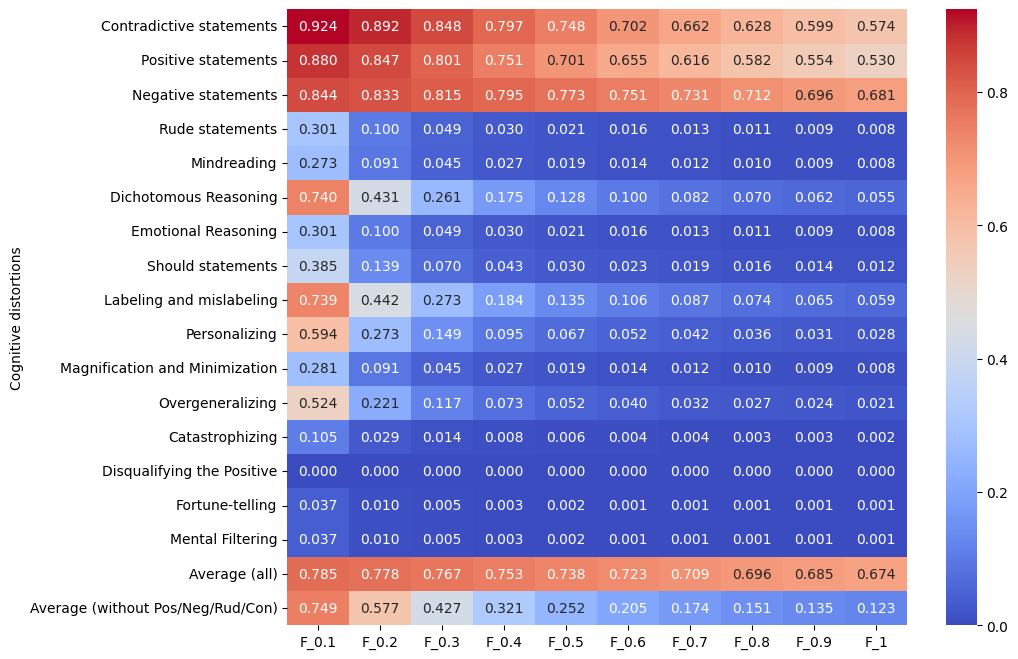

In [9]:
df_metrics.set_index('Cognitive distortions', inplace=True)
plt.figure(figsize=(10, 8))
sns.heatmap(df_metrics, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
plt.show()

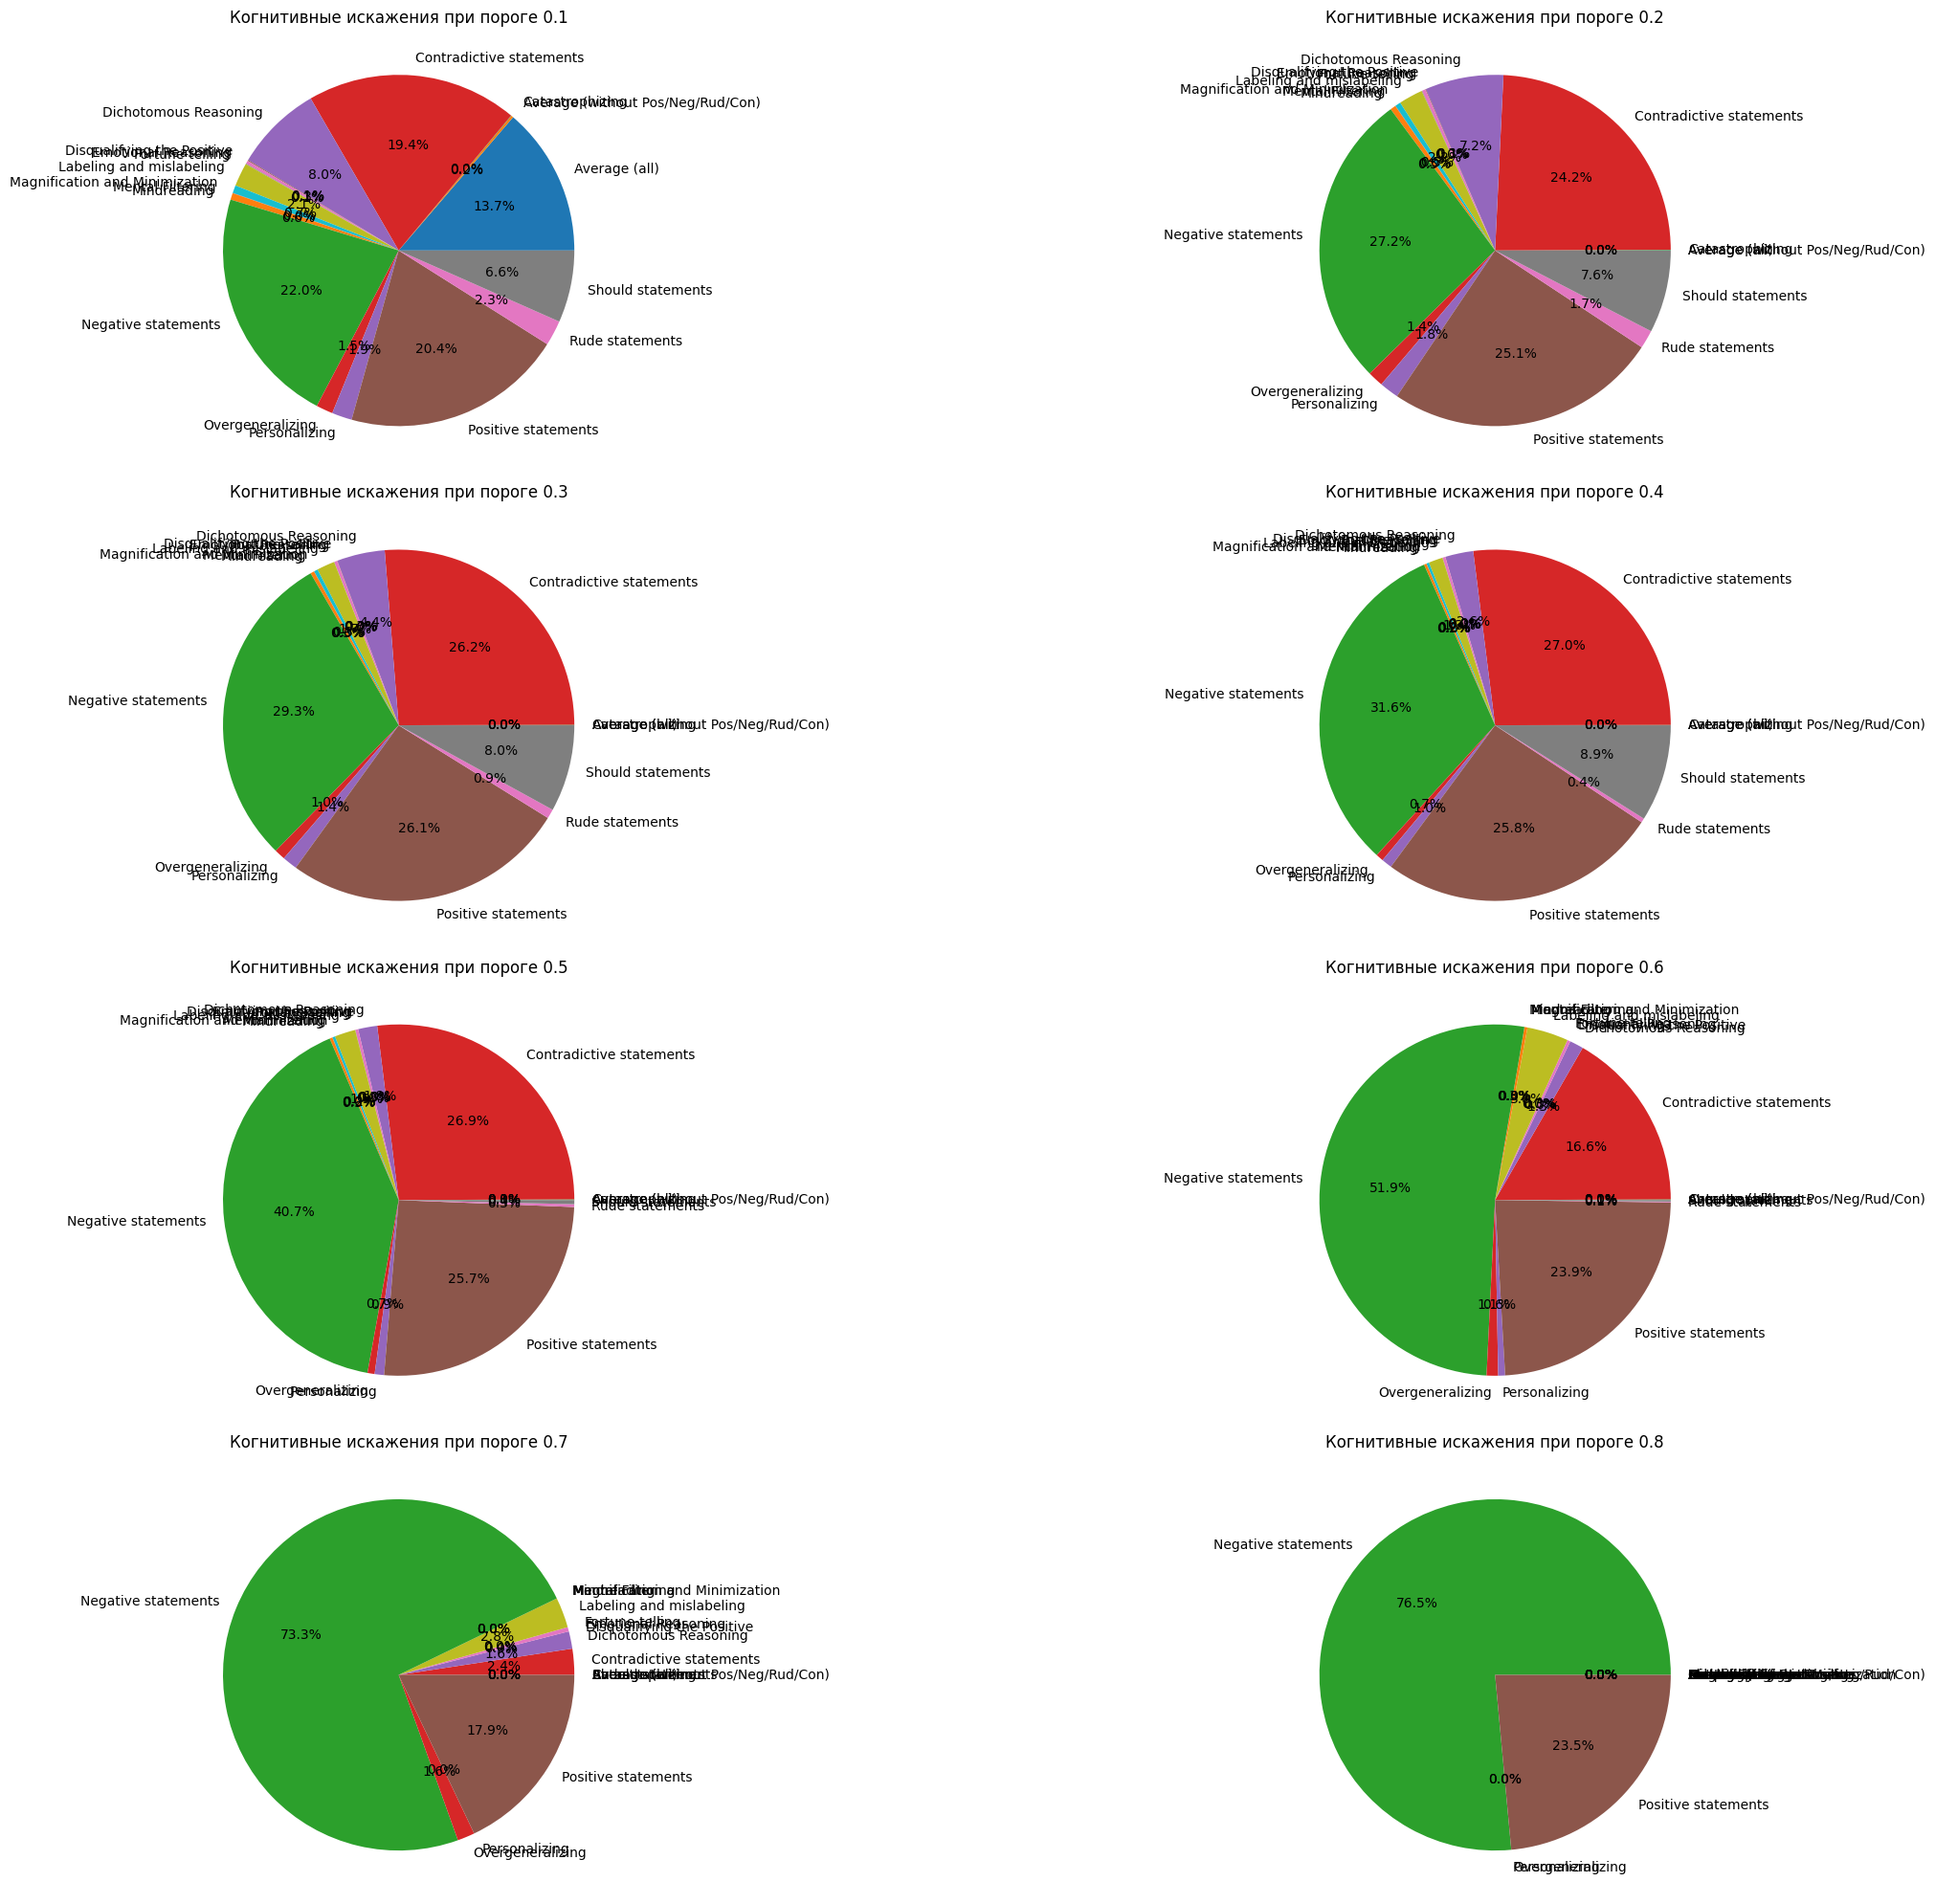

In [10]:
#Теперь посмотрим значения F1 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F1 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F1['Cognitive distortion'].tolist()
plt.figure(figsize=(25, 20))

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Text' and j != 'Label':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
    
    
    
    # Сделаем круговую диаграмму встречаемости каждого когнитивного искажения во всех текстах в зависимости от порога бинарной классификации
    exclude_columns = ['Text', 'Label']
    distortion_counts = df[df.columns.difference(exclude_columns)].sum()
    distortion_sum = sum(distortion_counts)
    if distortion_sum != 0:
        ax = plt.subplot(4, 2, int(k*10))
        ax.pie(distortion_counts, labels=distortion_counts.index, autopct='%1.1f%%')
        ax.set_title(f'Когнитивные искажения при пороге {k}')
     
    
    
    
    #для новой бинарной классификации смотрим F1 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Label'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Label'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Label'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_1 = (1+(1)**2) * (precision*recall)/((((1)**2)*precision)+recall)
        else:
            f_1 = 0
        
        df_F1.loc[count, k] = f_1
        count += 1

plt.tight_layout()
plt.show()
#df_F1

In [11]:
"""
df_F1.set_index('Cognitive distortion', inplace=True)
plt.figure(figsize=(10, 8))
sns.heatmap(df_F1, annot=True, fmt=".3f", annot_kws={"size": 10})
plt.show()
"""

'\ndf_F1.set_index(\'Cognitive distortion\', inplace=True)\nplt.figure(figsize=(10, 8))\nsns.heatmap(df_F1, annot=True, fmt=".3f", annot_kws={"size": 10})\nplt.show()\n'

In [12]:
#Теперь посмотрим значения F_0.2 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_02 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F_02['Cognitive distortion'].tolist()

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Text' and j != 'Label':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
        
    #для новой бинарной классификации смотрим F_0.2 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Label'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Label'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Label'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_2 = (1+(0.2)**2) * (precision*recall)/((((0.2)**2)*precision)+recall)
        else:
            f_0_2 = 0
        
        df_F_02.loc[count, k] = f_0_2
        count += 1

"""
#df_F_02
df_F_02.set_index('Cognitive distortion', inplace=True)
plt.figure(figsize=(10, 8))
sns.heatmap(df_F_02, annot=True, fmt=".3f", annot_kws={"size": 10})
plt.show()
"""




#Теперь посмотрим значения F_0.3 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_03 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F_03['Cognitive distortion'].tolist()

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Text' and j != 'Label':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
        
    #для новой бинарной классификации смотрим F_0.3 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Label'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Label'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Label'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_3 = (1+(0.3)**2) * (precision*recall)/((((0.3)**2)*precision)+recall)
        else:
            f_0_3 = 0
        
        df_F_03.loc[count, k] = f_0_3
        count += 1







#Теперь посмотрим значения F_0.4 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_04 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F_04['Cognitive distortion'].tolist()

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Text' and j != 'Label':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
        
    #для новой бинарной классификации смотрим F_0.4 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Label'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Label'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Label'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_4 = (1+(0.4)**2) * (precision*recall)/((((0.4)**2)*precision)+recall)
        else:
            f_0_4 = 0
        
        df_F_04.loc[count, k] = f_0_4
        count += 1






#Теперь посмотрим значения F_0.5 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_05 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F_05['Cognitive distortion'].tolist()

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Text' and j != 'Label':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
        
    #для новой бинарной классификации смотрим F_0.5 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Label'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Label'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Label'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_5 = (1+(0.5)**2) * (precision*recall)/((((0.5)**2)*precision)+recall)
        else:
            f_0_5 = 0
        
        df_F_05.loc[count, k] = f_0_5
        count += 1






#Теперь посмотрим значения F_0.6 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_06 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F_06['Cognitive distortion'].tolist()

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Text' and j != 'Label':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
        
    #для новой бинарной классификации смотрим F_0.6 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Label'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Label'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Label'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_6 = (1+(0.6)**2) * (precision*recall)/((((0.6)**2)*precision)+recall)
        else:
            f_0_6 = 0
        
        df_F_06.loc[count, k] = f_0_6
        count += 1







#Теперь посмотрим значения F_0.7 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_07 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F_07['Cognitive distortion'].tolist()

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Text' and j != 'Label':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
        
    #для новой бинарной классификации смотрим F_0.7 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Label'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Label'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Label'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_7 = (1+(0.7)**2) * (precision*recall)/((((0.7)**2)*precision)+recall)
        else:
            f_0_7 = 0
        
        df_F_07.loc[count, k] = f_0_7
        count += 1






#Теперь посмотрим значения F_0.8 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_08 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F_08['Cognitive distortion'].tolist()

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Text' and j != 'Label':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
        
    #для новой бинарной классификации смотрим F_0.8 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Label'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Label'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Label'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_8 = (1+(0.2)**2) * (precision*recall)/((((0.8)**2)*precision)+recall)
        else:
            f_0_8 = 0
        
        df_F_08.loc[count, k] = f_0_8
        count += 1








#Теперь посмотрим значения F_0.9 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_09 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F_09['Cognitive distortion'].tolist()

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Text' and j != 'Label':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
        
    #для новой бинарной классификации смотрим F_0.9 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Label'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Label'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Label'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_9 = (1+(0.9)**2) * (precision*recall)/((((0.9)**2)*precision)+recall)
        else:
            f_0_9 = 0
        
        df_F_09.loc[count, k] = f_0_9
        count += 1


In [13]:
#Теперь посмотрим значения F_0.1 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_01 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F_01['Cognitive distortion'].tolist()

count_should_threshold = [0]*10
count_neg_threshold = [0]*10

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Text' and j != 'Label':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
    
    count_should_threshold[int(10*k-1)] = ((df['Should statements'] > 0) & (df['Label'] == 1)).sum()
    count_neg_threshold[int(10*k-1)] = ((df['Negative statements'] > 0) & (df['Label'] == 1)).sum()    
    
    #для новой бинарной классификации смотрим F_0.1 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Label'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Label'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Label'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_1 = (1+(0.1)**2) * (precision*recall)/((((0.1)**2)*precision)+recall)
        else:
            f_0_1 = 0
        
        df_F_01.loc[count, k] = f_0_1
        count += 1


#df_F_01

In [14]:
"""
df_F_01.set_index('Cognitive distortion', inplace=True)
plt.figure(figsize=(10, 8))
sns.heatmap(df_F_01, annot=True, fmt=".3f", annot_kws={"size": 10})
plt.show()
"""

'\ndf_F_01.set_index(\'Cognitive distortion\', inplace=True)\nplt.figure(figsize=(10, 8))\nsns.heatmap(df_F_01, annot=True, fmt=".3f", annot_kws={"size": 10})\nplt.show()\n'

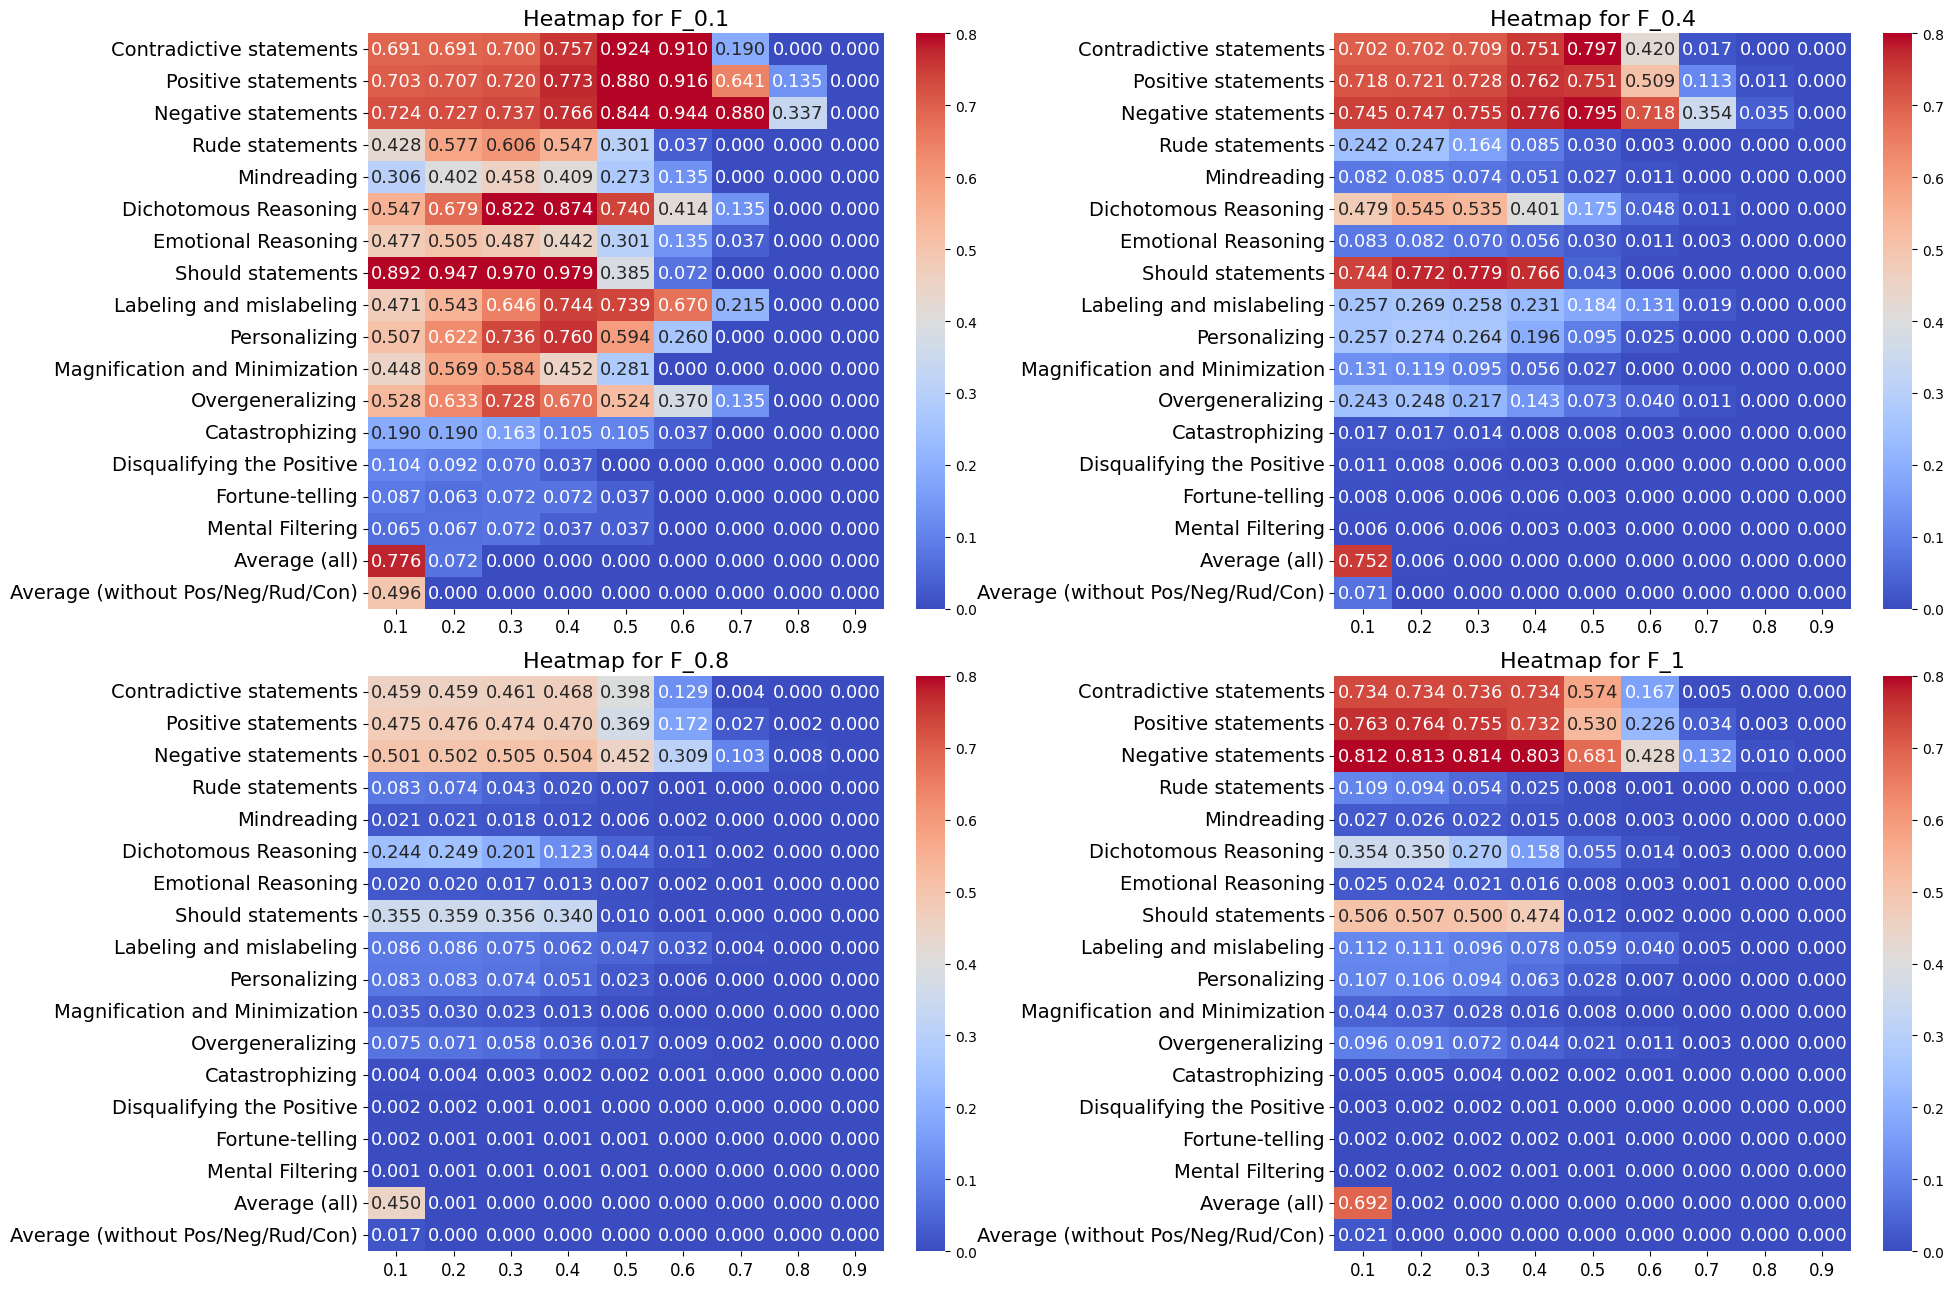

In [15]:

# Создаем фигуру и оси подграфиков
fig, axs = plt.subplots(2, 2, figsize=(20, 13))  # 2 строки, 5 столбцов

# Преобразуем оси подграфиков в одномерный массив для удобства обращения к ним
axs = axs.flatten()


df_F_01.set_index('Cognitive distortion', inplace=True)
#df_F_02.set_index('Cognitive distortion', inplace=True)
#df_F_03.set_index('Cognitive distortion', inplace=True)
df_F_04.set_index('Cognitive distortion', inplace=True)
#df_F_05.set_index('Cognitive distortion', inplace=True)
#df_F_06.set_index('Cognitive distortion', inplace=True)
#df_F_07.set_index('Cognitive distortion', inplace=True)
df_F_08.set_index('Cognitive distortion', inplace=True)
#df_F_09.set_index('Cognitive distortion', inplace=True)
df_F1.set_index('Cognitive distortion', inplace=True)



def debug_heatmap(df, ax, title):
    sns.heatmap(df, ax=ax, vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 13})  # Увеличиваем размер чисел в тепловой карте
    ax.set_title(title, fontsize=16)  # Увеличиваем размер заголовка
    ax.tick_params(axis='y', labelsize=14)  # Увеличиваем размер текста для индексов (меток строк)
    ax.tick_params(axis='x', labelsize=12)  # Увеличиваем размер текста для меток столбцов
    ax.set_ylabel('')  # Убираем название боковых индексов

# Отображаем тепловые карты
debug_heatmap(df_F_01, axs[0], 'Heatmap for F_0.1')
#debug_heatmap(df_F_02, axs[1], 'Heatmap for F_0.2')
#debug_heatmap(df_F_03, axs[2], 'Heatmap for F_0.3')
debug_heatmap(df_F_04, axs[1], 'Heatmap for F_0.4')
#debug_heatmap(df_F_05, axs[4], 'Heatmap for F_0.5')
#debug_heatmap(df_F_06, axs[5], 'Heatmap for F_0.6')
#debug_heatmap(df_F_07, axs[6], 'Heatmap for F_0.7')
debug_heatmap(df_F_08, axs[2], 'Heatmap for F_0.8')
#debug_heatmap(df_F_09, axs[8], 'Heatmap for F_0.9')
debug_heatmap(df_F1, axs[3], 'Heatmap for F_1')

# Отображаем графики
plt.tight_layout()
plt.savefig('heatmaps_second_dataset_1.png', bbox_inches='tight', dpi=150)
plt.show()

In [16]:
# Видно, что при увеличении параметра beta качество метрики should statements уменьшается, а negatine statements - увеличивается
# Когда параметр beta увеличивается, вес recall увеличивается, а вес precision уменьшается. И наоборот.
# Точные веса precision и recall в зависимости от beta можно посчитать по формулам:
# вес precision = 1/(1+beta**2)
# вес recall = beta**2/(1+beta**2)
# То есть при лучшем параметре beta = 0.1 мы получим следующие веса у precision и recall:
weight_precision = 1/(1+(0.1)**2)
weight_recall = (0.1)**2/(1+(0.1)**2)
print('Вес precision:', weight_precision)
print('Вес recall:', weight_recall)

Вес precision: 0.9900990099009901
Вес recall: 0.009900990099009903


In [17]:
df = df_future.copy()
count_should = ((df['Should statements'] > 0) & (df['Label'] == 1)).sum()
count_neg = ((df['Negative statements'] > 0) & (df['Label'] == 1)).sum()
count_pos = ((df['Positive statements'] > 0) & (df['Label'] == 1)).sum()
count_contr = ((df['Contradictive statements'] > 0) & (df['Label'] == 1)).sum()
all_dist = (df['Label'] == 1).sum()
print('Процент Should statements в исходном датасете:', count_should/all_dist)
print('Процент Negative statements в исходном датасете:', count_neg/all_dist)
#просто суммируем число ненулевых ячеек в каждом столбце

Процент Should statements в исходном датасете: 0.3519660755589823
Процент Negative statements в исходном датасете: 0.9271395528141866


In [18]:
sum_should = df.loc[df['Label'] == 1, 'Should statements'].sum()
sum_neg = df.loc[df['Label'] == 1, 'Negative statements'].sum()
sum_pos = df.loc[df['Label'] == 1, 'Positive statements'].sum()
sum_contr = df.loc[df['Label'] == 1, 'Contradictive statements'].sum()

"""
sum_rude = df.loc[df['Label'] == 1, 'Rude statements'].sum()
sum_mind = df.loc[df['Label'] == 1, 'Mindreading'].sum()
sum_d_r = df.loc[df['Label'] == 1, 'Dichotomous Reasoning'].sum()
sum_em_r = df.loc[df['Label'] == 1, 'Emotional Reasoning'].sum()
sum_label = df.loc[df['Label'] == 1, 'Labeling and mislabeling'].sum()
sum_pers = df.loc[df['Label'] == 1, 'Personalizing'].sum()
sum_mag_min = df.loc[df['Label'] == 1, 'Magnification and Minimization'].sum()
sum_over = df.loc[df['Label'] == 1, 'Overgeneralizing'].sum()
Catastrophizing	Disqualifying the Positive	Fortune-telling	Mental Filtering
"""

print('Сумма Should statements в исходном датасете по отношению к числу искаженных текстов:', sum_should/all_dist)
print('Сумма Negative statements в исходном датасете по отношению к числу искаженных текстов:', sum_neg/all_dist)

Сумма Should statements в исходном датасете по отношению к числу искаженных текстов: 0.15377794911333847
Сумма Negative statements в исходном датасете по отношению к числу искаженных текстов: 0.503396299151889


In [19]:
print('Среднее значение, которое принимает Should statement при наличии такового в тексте', sum_should/count_should)
print('Среднее значение, которое принимает Negative statement при наличии такового в тексте', sum_neg/count_neg)
print('Среднее значение, которое принимает Positive statements при наличии такового в тексте', sum_pos/count_pos)
print('Среднее значение, которое принимает Contradictive statements при наличии такового в тексте', sum_contr/count_contr)

Среднее значение, которое принимает Should statement при наличии такового в тексте 0.4369112814895948
Среднее значение, которое принимает Negative statement при наличии такового в тексте 0.5429563409563409
Среднее значение, которое принимает Positive statements при наличии такового в тексте 0.49625922509225084
Среднее значение, которое принимает Contradictive statements при наличии такового в тексте 0.5087346134908912


In [20]:
for i in range(10):
    count_should_threshold[i] = count_should_threshold[i]/all_dist
    count_neg_threshold[i] = count_neg_threshold[i]/all_dist

print('Процент Should statements в зависимости от порога бинарной классификации:', count_should_threshold)
print()
print('Процент Negative statements в зависимости от порога бинарной классификации:', count_neg_threshold)

# Порог смотрим от 0.1 до 1 в порядке возрастания

Процент Should statements в зависимости от порога бинарной классификации: [0.35119506553585195, 0.3438704703161141, 0.3346183500385505, 0.3107170393215112, 0.006168080185042405, 0.0007710100231303007, 0.0, 0.0, 0.0, 0.0]

Процент Negative statements в зависимости от порога бинарной классификации: [0.9271395528141866, 0.9259830377794911, 0.912875867386276, 0.8430994602929838, 0.569390902081727, 0.2748650732459522, 0.07054741711642251, 0.0050115651503469544, 0.0, 0.0]


In [21]:
filtered_df = df[df['Label'] == 1]

# Вычисление среднего значения по столбцу 'A' для отфильтрованных строк
mean_values = {}
for column in df.columns[2:]:  # Исключаем последний столбец 'B'
    mean_values[column] = filtered_df[filtered_df[column] != 0][column].mean()

print(mean_values)

{'Contradictive statements': 0.5087346134908913, 'Positive statements': 0.49625922509225096, 'Negative statements': 0.5429563409563409, 'Rude statements': 0.30699386503067483, 'Mindreading': 0.4255555555555556, 'Dichotomous Reasoning': 0.35348596750369277, 'Emotional Reasoning': 0.45303030303030295, 'Should statements': 0.43691128148959474, 'Labeling and mislabeling': 0.4781707317073171, 'Personalizing': 0.4179220779220779, 'Magnification and Minimization': 0.3511864406779661, 'Overgeneralizing': 0.39035971223021587, 'Catastrophizing': 0.45999999999999996, 'Disqualifying the Positive': 0.29499999999999993, 'Fortune-telling': 0.38999999999999996, 'Mental Filtering': 0.475, 'Average (all)': 0.10567714396585177, 'Average (without Pos/Neg/Rud/Con)': 0.03476403689442106}
